In [3]:
!python -m pip install scrublet
!python -m pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
# sample filtered bc matrix are in 
#/g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/<SAMPLE>/outs/filtered_feature_bc_matrix


In [3]:
# set save = True to save a csv with the doublet scores and predictions for each cell
def scrub_func(sample_name, 
               exp_doublets=0.06, 
               thresh = 0, 
               sim_ratio = 2, 
               save = False):
    input_dir = '/g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/{}/outs/filtered_feature_bc_matrix'.format(sample_name)
    print('Using input directory: '+ input_dir)
    counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
    genes = np.array(scr.load_genes(input_dir + '/features.tsv',
                                    delimiter='\t', 
                                    column=1))
    print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0],
                                                            counts_matrix.shape[1]))
    print('Number of genes in gene list: {}'.format(len(genes)))
    scrub = scr.Scrublet(counts_matrix,
                         expected_doublet_rate=exp_doublets,
                         sim_doublet_ratio = sim_ratio)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                              min_cells=3,
                                                              min_gene_variability_pctl=85,
                                                              n_prin_comps=30)
    if thresh != 0:
        scrub.call_doublets(threshold = thresh)
    scrub.plot_histogram();
    print('Running UMAP...')
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
    print('Done.')
    scrub.plot_embedding('UMAP', order_points=True);
    if save == True:
        df = pd.DataFrame({
            'doublet_score': scrub.doublet_scores_obs_,
            'predicted_doublet': scrub.predicted_doublets_
        })
        df.to_csv('/g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/scrublet/hg38/{}_scrublet_output_table.csv'.format(sample_name), index=False)  

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/E019-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 5315 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.5%
Elapsed time: 4.1 seconds
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 5.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 19.0%
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


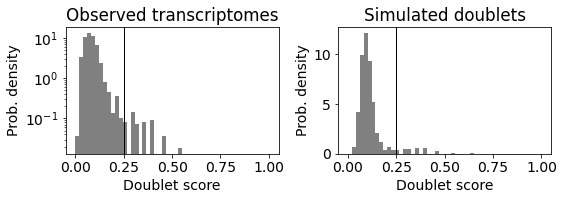

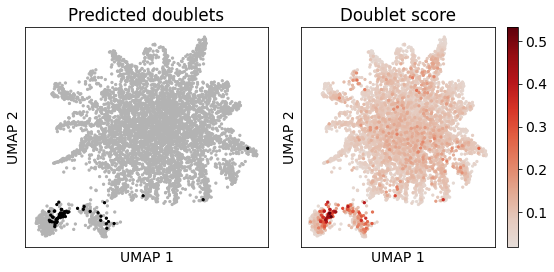

In [6]:
scrub_func("E019-1", thresh=0.25, save=True)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E123-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 6684 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.62
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 10.7 seconds
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 9.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.6%
Running UMAP...
Done.


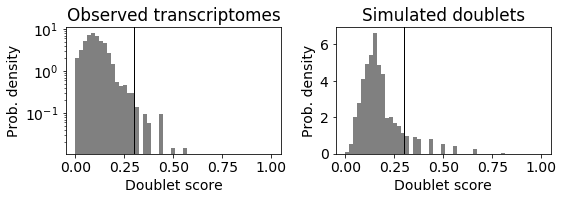

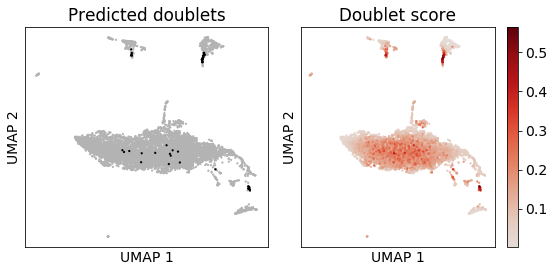

In [6]:
scrub_func("E123-1", save=True, thresh=0.3)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E140-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 10162 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 17.8%
Elapsed time: 21.1 seconds
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 17.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 10.5%
Running UMAP...
Done.


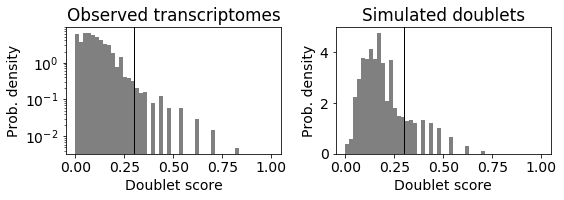

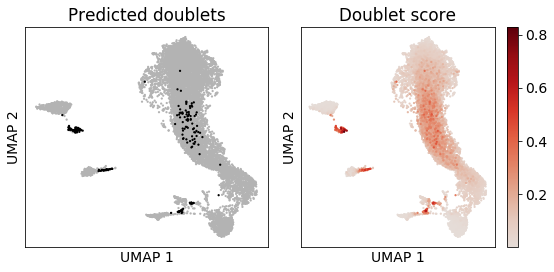

In [7]:
scrub_func("E140-1", thresh=0.3 ,save=True)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E143-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 9429 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.1%
Elapsed time: 16.0 seconds
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 3.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.3%
Running UMAP...
Done.


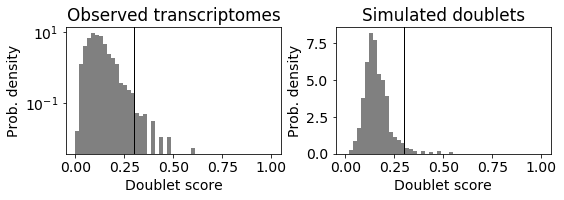

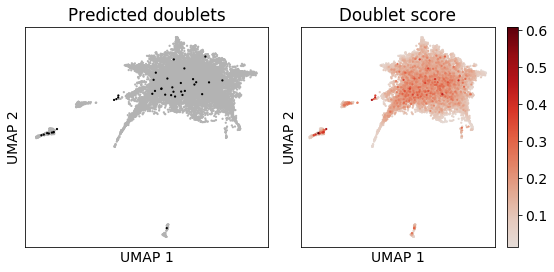

In [8]:
scrub_func("E143-1", thresh = 0.3, save=True)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E146-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 6165 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.2%
Elapsed time: 8.1 seconds
Detected doublet rate = 2.4%
Estimated detectable doublet fraction = 20.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.8%
Running UMAP...
Done.


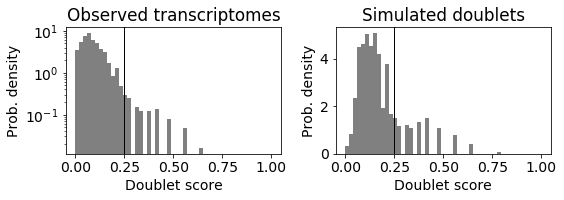

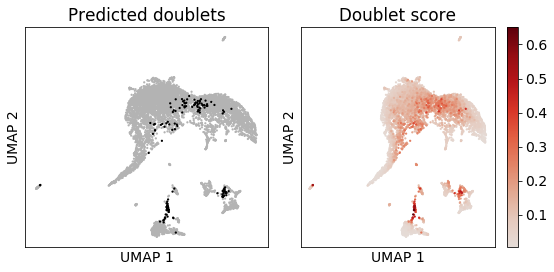

In [9]:
scrub_func("E146-1", save=True, thresh=0.25)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E156-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 5914 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 22.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.6%
Elapsed time: 11.0 seconds
Running UMAP...
Done.


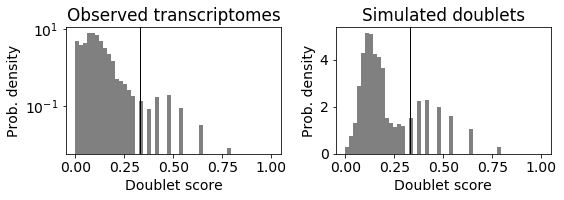

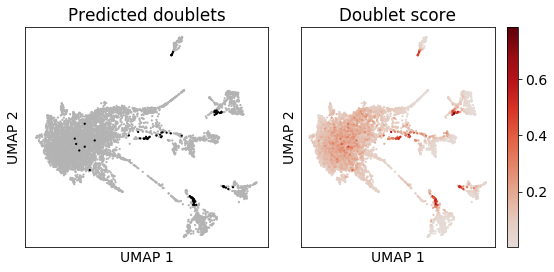

In [10]:
scrub_func("E156-1", save=True)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E166-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 6982 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 12.2 seconds
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 11.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 17.0%
Running UMAP...
Done.


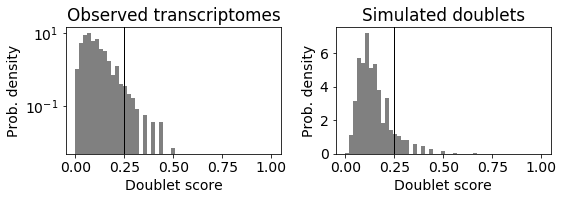

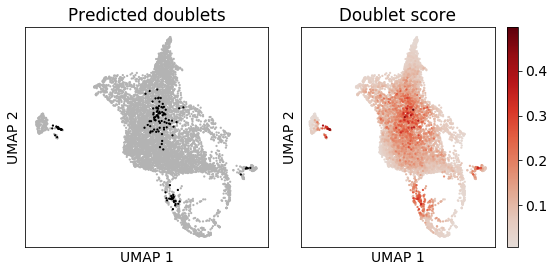

In [11]:
scrub_func("E166-1", save=True, thresh=0.25)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E171-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 10033 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.3%
Elapsed time: 22.9 seconds
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 11.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.6%
Running UMAP...
Done.


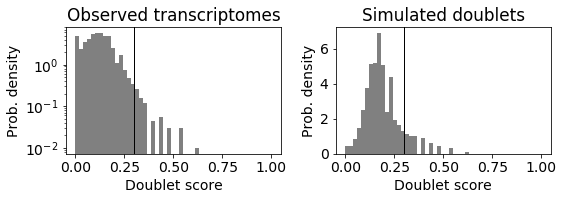

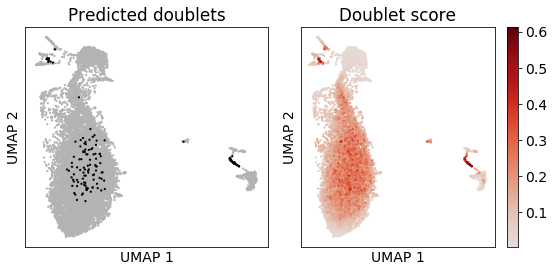

In [12]:
scrub_func("E171-1", thresh=0.3, save=True)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E197-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 3928 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 63.2%
Elapsed time: 4.1 seconds
Detected doublet rate = 6.0%
Estimated detectable doublet fraction = 19.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 31.4%
Running UMAP...
Done.


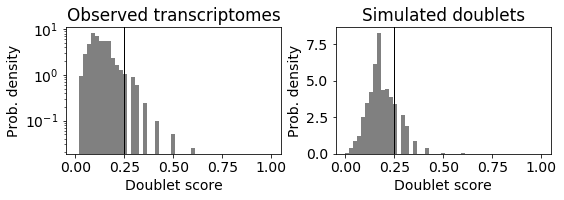

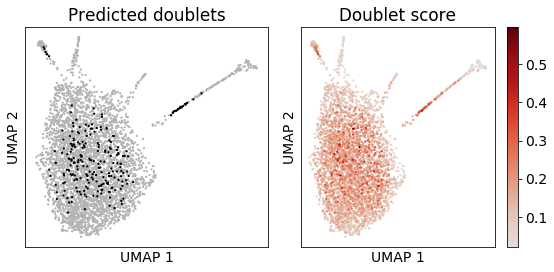

In [13]:
scrub_func("E197-1", save=True, thresh=0.25)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/E225-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 9710 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 20.0%
Elapsed time: 16.8 seconds
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 8.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 20.4%
Running UMAP...
Done.


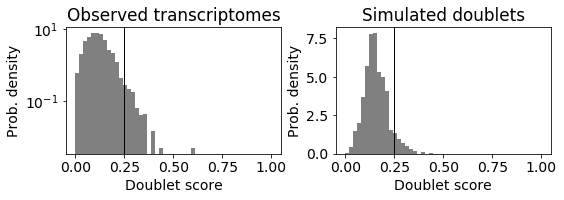

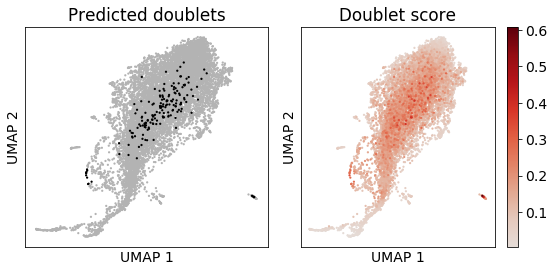

In [14]:
scrub_func("E225-1", thresh=0.25, save=True)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/NAM021/outs/filtered_feature_bc_matrix
Counts matrix shape: 5183 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 7.2%
Estimated detectable doublet fraction = 58.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.5%
Elapsed time: 7.0 seconds
Running UMAP...
Done.


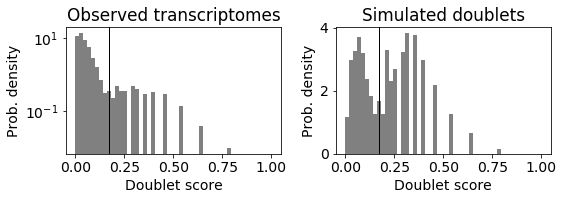

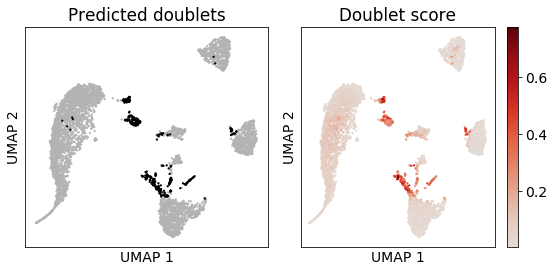

In [15]:
scrub_func("NAM021", save=True)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/NAM025/outs/filtered_feature_bc_matrix
Counts matrix shape: 4426 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 5.5%
Estimated detectable doublet fraction = 46.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 12.0%
Elapsed time: 5.5 seconds
Running UMAP...
Done.


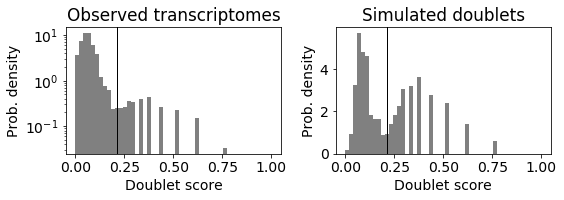

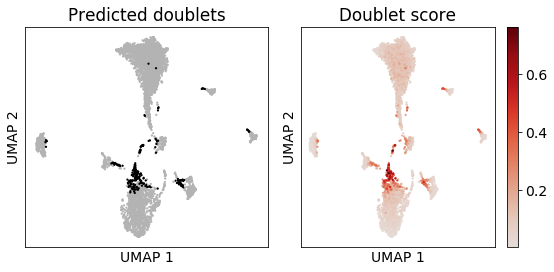

In [16]:
scrub_func("NAM025", save=True)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/NPG103/outs/filtered_feature_bc_matrix
Counts matrix shape: 2911 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.5%
Elapsed time: 3.1 seconds
Detected doublet rate = 2.9%
Estimated detectable doublet fraction = 31.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.2%
Running UMAP...
Done.


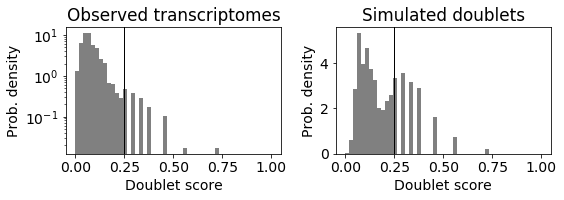

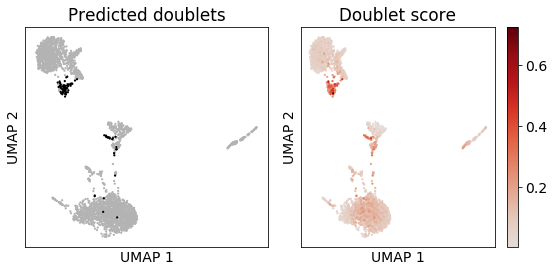

In [17]:
scrub_func("NPG103", save=True, thresh=0.25)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/P018-PGL1/outs/filtered_feature_bc_matrix
Counts matrix shape: 4560 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.1%
Elapsed time: 6.5 seconds
Detected doublet rate = 4.1%
Estimated detectable doublet fraction = 28.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 14.8%
Running UMAP...
Done.


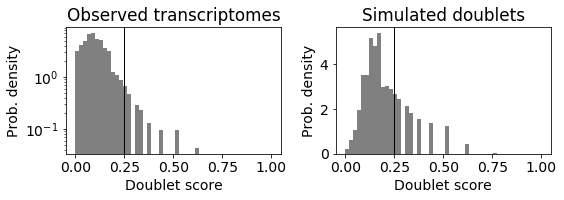

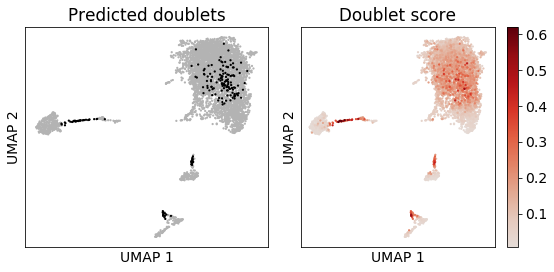

In [18]:
scrub_func("P018-PGL1", save=True, thresh=0.25)

Using input directory: /data/gpfs/projects/punim0648/Projects/Blake/A5_R_project/Data/snRNA-seq/hg38-counts/P018-PGL3/outs/filtered_feature_bc_matrix
Counts matrix shape: 4084 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 3.2%
Estimated detectable doublet fraction = 55.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.9%
Elapsed time: 4.3 seconds
Running UMAP...
Done.


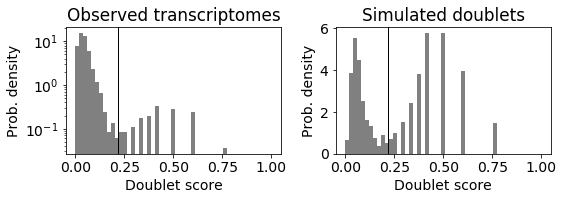

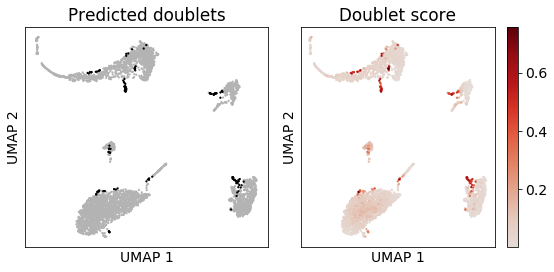

In [19]:
scrub_func("P018-PGL3", save=True)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/E196-1/outs/filtered_feature_bc_matrix
Counts matrix shape: 2856 rows, 32738 columns
Number of genes in gene list: 32738
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 15.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.1%
Elapsed time: 6.6 seconds
Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


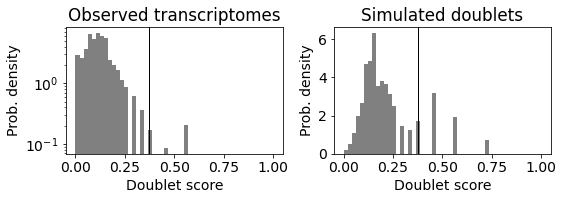

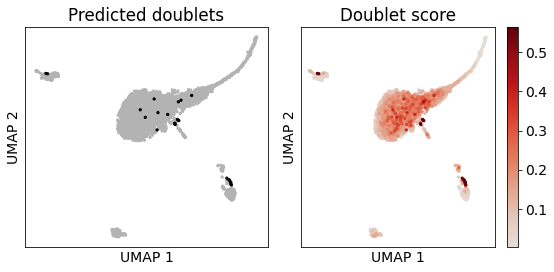

In [12]:
scrub_func("E196-1", save=True)

Using input directory: /g/data/pq08/projects/ppgl/a5/sn_rna_seq/analysis/cellranger_hg38/E018/outs/filtered_feature_bc_matrix
Counts matrix shape: 5158 rows, 36601 columns
Number of genes in gene list: 36601
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 15.8%
Elapsed time: 8.9 seconds
Detected doublet rate = 3.9%
Estimated detectable doublet fraction = 25.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 15.3%


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Running UMAP...


/home/563/af6764/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/563/af6764/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


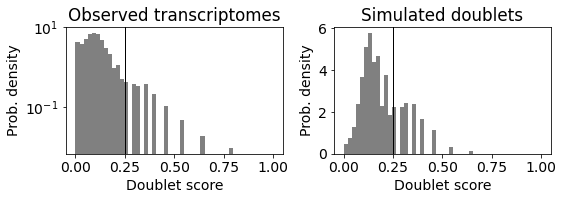

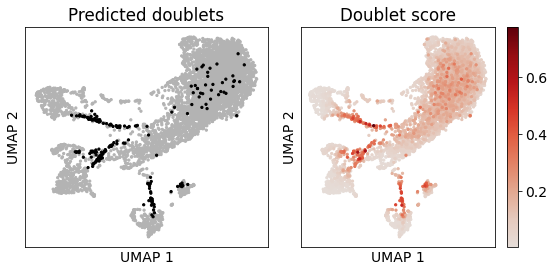

In [5]:
scrub_func("E018", save=True, thresh=0.25)

In [22]:
#scrub_func("VPH36T", save=True)